
Q1. Can you identify whether teachers Rating Data is a time serires or cross sectional?

The Teachers Rating Data is a cross-sectional dataset as a time series dataset tracks how one entity’s values change over time (e.g., a teacher’s rating each month for several years) but here we captures different entities at a single point in time.

Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
# random dataset
np.random.seed(42)
random.seed(42)
n = 110
prof_names = [f"Prof_{i}" for i in np.random.randint(1, 99, n)]
gender = np.random.choice(['Male', 'Female'], size=n)
tenure = np.random.choice(['Yes', 'No'], size=n)
beauty = np.random.normal(6, 1.2, n)
rating = np.random.normal(4, 0.5, n)
students = np.random.randint(50, 170, n)
age = np.random.randint(25, 60, n)
division = np.random.choice(['Lower Division', 'Upper Division'], size=n)
outlier_indices = random.sample(range(n), 3)
beauty[outlier_indices[0]] = 10.0
beauty[outlier_indices[1]] = 1.5
students[outlier_indices[2]] = 300

In [5]:
df = pd.DataFrame({
    'Prof': prof_names,
    'Gender': gender,
    'Tenure': tenure,
    'Beauty': beauty.round(2),
    'Rating': rating.round(2),
    'Students': students,
    'Age': age,
    'Division': division
})

In [6]:
df.head(10)

Teachers Rating Dataset (First 10 Rows)


,Prof,Gender,Tenure,Beauty,Rating,Students,Age,Division
0,Prof_52,Male,Yes,4.99,4.04,74,37,Upper Division
1,Prof_93,Female,No,6.81,3.70,105,57,Lower Division
2,Prof_15,Female,Yes,8.25,3.66,82,58,Lower Division
3,Prof_72,Female,Yes,6.48,3.87,300,59,Lower Division
4,Prof_61,Male,Yes,5.25,3.86,166,25,Upper Division
5,Prof_21,Male,Yes,5.37,3.70,55,45,Lower Division
6,Prof_83,Male,No,6.02,3.73,107,30,Lower Division
7,Prof_87,Male,No,6.45,4.55,93,52,Lower Division
8,Prof_75,Female,Yes,6.08,5.06,94,41,Upper Division
9,Prof_75,Male,Yes,6.60,3.75,81,29,Upper Division


Q2. Find the mean, median, minimum and maximum values for the students.

In [7]:
import statistics as stats

students = [86, 99, 77, 78, 89, 69, 95, 89, 84, 94]

mean_value = stats.mean(students)
median_value = stats.median(students)
min_value = min(students)
max_value = max(students)

print("Mean:", mean_value)
print("Median:", median_value)
print("Minimum:", min_value)
print("Maximum:", max_value)


Mean: 86
Median: 87.5
Minimum: 69
Maximum: 99


Q3. Produce the descriptive statistics table

In [8]:
import pandas as pd
data = {
    'Math': [87, 92, 74, 91, 75],
    'Science': [80, 55, 23, 40, 82],
    'English': [55, 82, 85, 88, 90],
    'History': [88, 45, 83, 89, 91]
}

df = pd.DataFrame(data)
desc_stats = df.describe()

print(desc_stats)


            Math   Science   English   History
count   5.000000   5.00000   5.00000   5.00000
mean   83.800000  56.00000  80.00000  79.20000
std     8.700575  25.48529  14.30035  19.34425
min    74.000000  23.00000  55.00000  45.00000
25%    75.000000  40.00000  82.00000  83.00000
50%    87.000000  55.00000  85.00000  88.00000
75%    91.000000  80.00000  88.00000  89.00000
max    92.000000  82.00000  90.00000  91.00000


Q4. Create a histogram of the beauty variable and breifly comment on the distribution of the data.

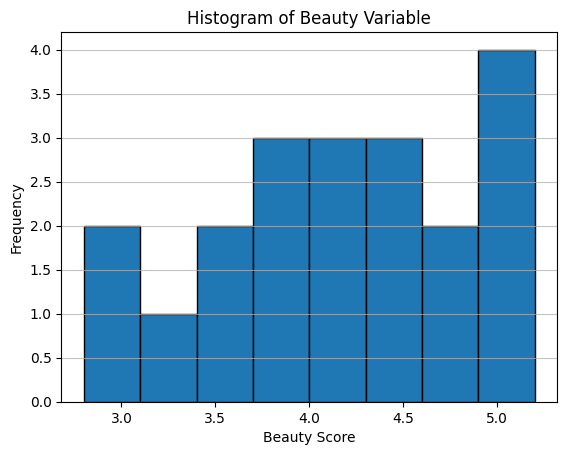

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'beauty': [3.5, 4.2, 5.1, 4.8, 3.9, 4.6, 2.8, 3.7, 4.0, 4.4,
                   5.0, 3.2, 4.9, 3.6, 4.1, 4.3, 5.2, 3.8, 2.9, 4.5]}
df = pd.DataFrame(data)

plt.hist(df['beauty'], bins=8, edgecolor='black')
plt.title('Histogram of Beauty Variable')
plt.xlabel('Beauty Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Q5. Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors 6

In [10]:
import pandas as pd

data = {
    'gender': ['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female'],
    'beauty': [2.9, 5.1, 3.4, 4.8, 3.1, 5.3, 3.7, 4.9, 2.8, 5.0]
}

df = pd.DataFrame(data)
summary = df.groupby('gender')['beauty'].agg(['mean', 'std', 'count'])

print("Descriptive statistics of beauty score by gender:")
print(summary)


Descriptive statistics of beauty score by gender:
        mean       std  count
gender                       
female  5.02  0.192354      5
male    3.18  0.370135      5


Q6. Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

In [11]:
import pandas as pd
data = {
    'gender': ['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female'],
    'tenure': ['yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes']
}

df = pd.DataFrame(data)
tenure_percent = (
    df.groupby('gender')['tenure']
      .value_counts(normalize=True)
      .unstack() * 100
)

print("Percentage of tenure status by gender:")
print(tenure_percent.round(2))


Percentage of tenure status by gender:
tenure    no   yes
gender            
female  60.0  40.0
male    20.0  80.0


>Yes, in this dataset male instructors have a higher tenure percentage than females.

->Females have a higher proportion of tenured professors than males.

This shows a gender-based difference in tenure, at least in this small sample.